<a href="https://colab.research.google.com/github/navas604/Statistical-Learning-II/blob/main/Practica%203%20-%20Maldicion%20de%20Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Statistical Learning II**
## **Antonio Everardo Navas Contreras, 14003163**
## **28/07/2021**

---

## **PRÁCTICA 3 - MALDICIÓN DE DIMENSIONALIDAD**

---

### CARGAR LIBRERIAS

In [1]:
# Importar las librerías que se utilizarán

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

### CARGAR, PREPARAR Y EXPLORAR EL DATASET

In [2]:
# Cargar el Dataset original

URL = "proyecto_training_data.npy"
dataset = np.load(URL) 

In [3]:
# Convertirlo a DataFrame
variables = list(["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
dataset = pd.DataFrame(dataset, columns=variables)

# Mover columna SalePrice al final del DataFrame
col = dataset.pop('SalePrice')
dataset.insert(len(dataset.columns), col.name, col)

dataset.head()

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,SalePrice
0,7.0,856.0,8.0,2003.0,65.0,208500.0
1,6.0,1262.0,6.0,1976.0,80.0,181500.0
2,7.0,920.0,6.0,2001.0,68.0,223500.0
3,7.0,961.0,7.0,1915.0,60.0,140000.0
4,8.0,1145.0,9.0,2000.0,84.0,250000.0


In [4]:
# Validar los tipos de variables

dataset.dtypes

OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
SalePrice       float64
dtype: object

In [5]:
# Explorando el Dataset

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values: \n", np.isnan(dataset).sum())

Dataset Shape:        (1460, 6)
Dataset type:         <class 'pandas.core.frame.DataFrame'>
Dataset nan values: 
 OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
SalePrice         0
dtype: int64


In [6]:
# Limpiar el dataset de valores "nan"
dataset = dataset[~np.isnan(dataset).any(axis=1)]

# Reset de los index del DataFrame
dataset = dataset.reset_index(drop=True)

In [7]:
# Explorando el Dataset

print("Dataset Shape:       ", dataset.shape)
print("Dataset type:        ", type(dataset))
print("Dataset nan values: \n", np.isnan(dataset).sum())

Dataset Shape:        (1201, 6)
Dataset type:         <class 'pandas.core.frame.DataFrame'>
Dataset nan values: 
 OverallQual     0
1stFlrSF        0
TotRmsAbvGrd    0
YearBuilt       0
LotFrontage     0
SalePrice       0
dtype: int64


In [8]:
# Variables de entrada, (Dependiente e Independiente)

SalePrice = dataset["SalePrice"]
OverallQual = dataset["OverallQual"]

In [9]:
# Guardar numero de filas y columnas

rows, columns = dataset.shape

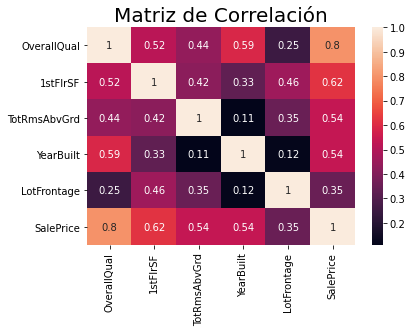

In [10]:
# Matriz de Correlación entre todas las variables
corr_matrix = round(dataset.corr(), 2)

# Visualización de Matriz de Correlación entre todas las variables
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlación", fontdict={"fontsize":20, "color":"black"})
plt.show()

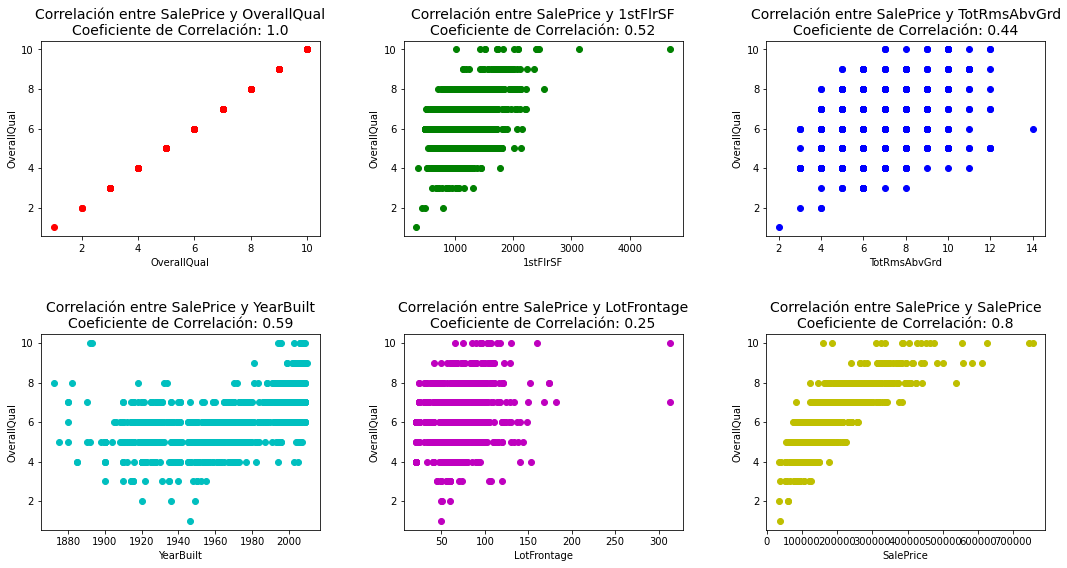

In [11]:
# Gráfica de dispersión de cada variable x con y ("SalePrice")

plt.figure(figsize=(18, 9))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

colors = ["r", "g", "b", "c", "m", "y"]

for i in range(columns):
  plt.subplot(2, 3, i+1)
  plt.scatter(dataset.iloc[:,i], dataset.iloc[:,0], color=colors[i])
  plt.title("Correlación entre SalePrice y {}\nCoeficiente de Correlación: {}".format(dataset.columns[i], corr_matrix.iloc[0,i]),
            fontdict={"fontsize":14, "color":"black"})
  plt.xlabel(dataset.columns[i])
  plt.ylabel(dataset.columns[0])

plt.show()

### Features Polinómicas con PolynomialFeatures de SKLEARN

In [12]:
dataset.head()

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,SalePrice
0,7.0,856.0,8.0,2003.0,65.0,208500.0
1,6.0,1262.0,6.0,1976.0,80.0,181500.0
2,7.0,920.0,6.0,2001.0,68.0,223500.0
3,7.0,961.0,7.0,1915.0,60.0,140000.0
4,8.0,1145.0,9.0,2000.0,84.0,250000.0




----------------------------------------------------------------
Variables: 1, Degree: 1, Features: 2
Variables: 1, Degree: 2, Features: 3
Variables: 1, Degree: 3, Features: 4
Variables: 1, Degree: 4, Features: 5
Variables: 1, Degree: 5, Features: 6
Variables: 1, Degree: 6, Features: 7
Variables: 1, Degree: 7, Features: 8
Variables: 1, Degree: 8, Features: 9
Variables: 1, Degree: 9, Features: 10


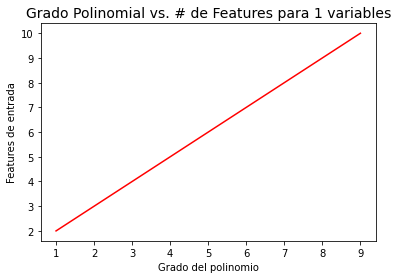



----------------------------------------------------------------
Variables: 2, Degree: 1, Features: 3
Variables: 2, Degree: 2, Features: 6
Variables: 2, Degree: 3, Features: 10
Variables: 2, Degree: 4, Features: 15
Variables: 2, Degree: 5, Features: 21
Variables: 2, Degree: 6, Features: 28
Variables: 2, Degree: 7, Features: 36
Variables: 2, Degree: 8, Features: 45
Variables: 2, Degree: 9, Features: 55


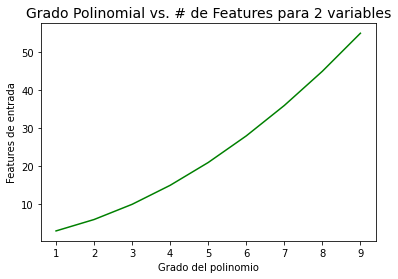



----------------------------------------------------------------
Variables: 3, Degree: 1, Features: 4
Variables: 3, Degree: 2, Features: 10
Variables: 3, Degree: 3, Features: 20
Variables: 3, Degree: 4, Features: 35
Variables: 3, Degree: 5, Features: 56
Variables: 3, Degree: 6, Features: 84
Variables: 3, Degree: 7, Features: 120
Variables: 3, Degree: 8, Features: 165
Variables: 3, Degree: 9, Features: 220


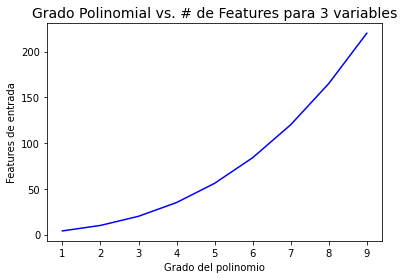

In [13]:
# Calcular el cambio de numero de features

degrees = range(1, 10)
variables = range(1, 4)

for i in variables:
  features = list()
  print('\n')
  print('----------------------------------------------------------------')

  for j in degrees:
    poly_1 = PolynomialFeatures(degree=j)
    dataset_transformed = poly_1.fit_transform(dataset.iloc[:,:i])
    features.append(dataset_transformed.shape[1])
    
    print('Variables: {}, Degree: {}, Features: {}'.format(i, j, dataset_transformed.shape[1]))
  
  colors = ["r", "g", "b", "c", "m", "y"]
  plt.plot(degrees, features, color=colors[i-1])
  plt.title("Grado Polinomial vs. # de Features para {} variables".format(i),
            fontdict={"fontsize":14, "color":"black"})
  plt.xlabel('Grado del polinomio')
  plt.ylabel('Features de entrada')

  plt.show()


### CONCLUSIONES

* Se puede observar que a medida que se aumenta el grado del polinomio, aumentan las features generadas.

* Se puede observar que a medida que se aumenta la cantidad de variables a considerar, aumentan las features generadas.

* Con 1 variable el crecimiento de las features se observa lineal, pero a medida que aumenta el número de variables se observa un comportamiento de crecimiento exponencial en la cantidad de features generadas. 
